In [38]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
import warnings
warnings.filterwarnings("ignore")

In [39]:
#Importing dataset from csv into a pandas dataframe
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\Hackathons\Tata Technologies\dataset.csv")

In [40]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [41]:
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [42]:
data.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

## Separating features and target columns

In [43]:
#features
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
#target
y = data['Target']

## Train Test Split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building

In [45]:
model = LogisticRegression(random_state = 42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [46]:
y_pred = model.predict(X_test_scaled)

In [47]:
print("\nPredictions:")
y_pred


Predictions:


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Model Evaluation

In [48]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[1930    9]
 [  45   16]]


<Axes: >

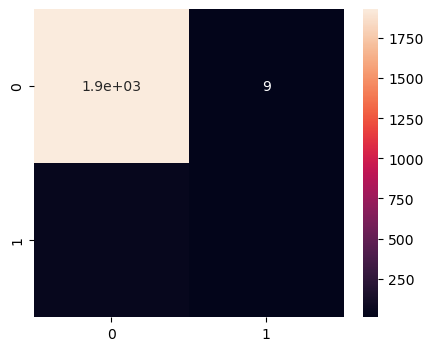

In [49]:
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True, xticklabels = model.classes_, yticklabels = model.classes_)

In [50]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.64      0.26      0.37        61

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")

Accuracy: 97.3 %


In [52]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

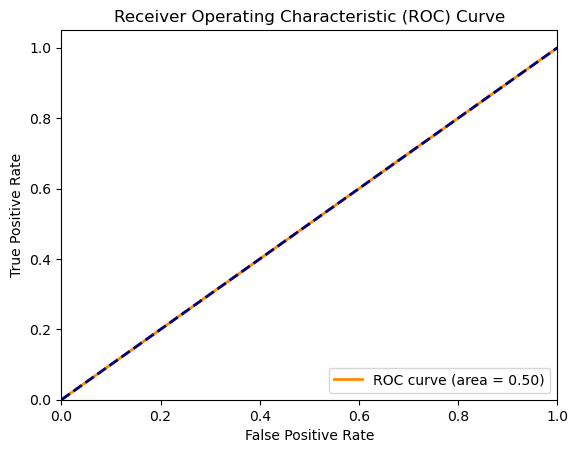

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Terminated